# read data

In [96]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [97]:
df = pd.read_csv("data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# summary

In [98]:
df.shape

(1338, 7)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [100]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [101]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# null values

In [102]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [103]:
cats = df.select_dtypes("object").columns.to_list()
nums = df.select_dtypes(exclude="object").columns.to_list()

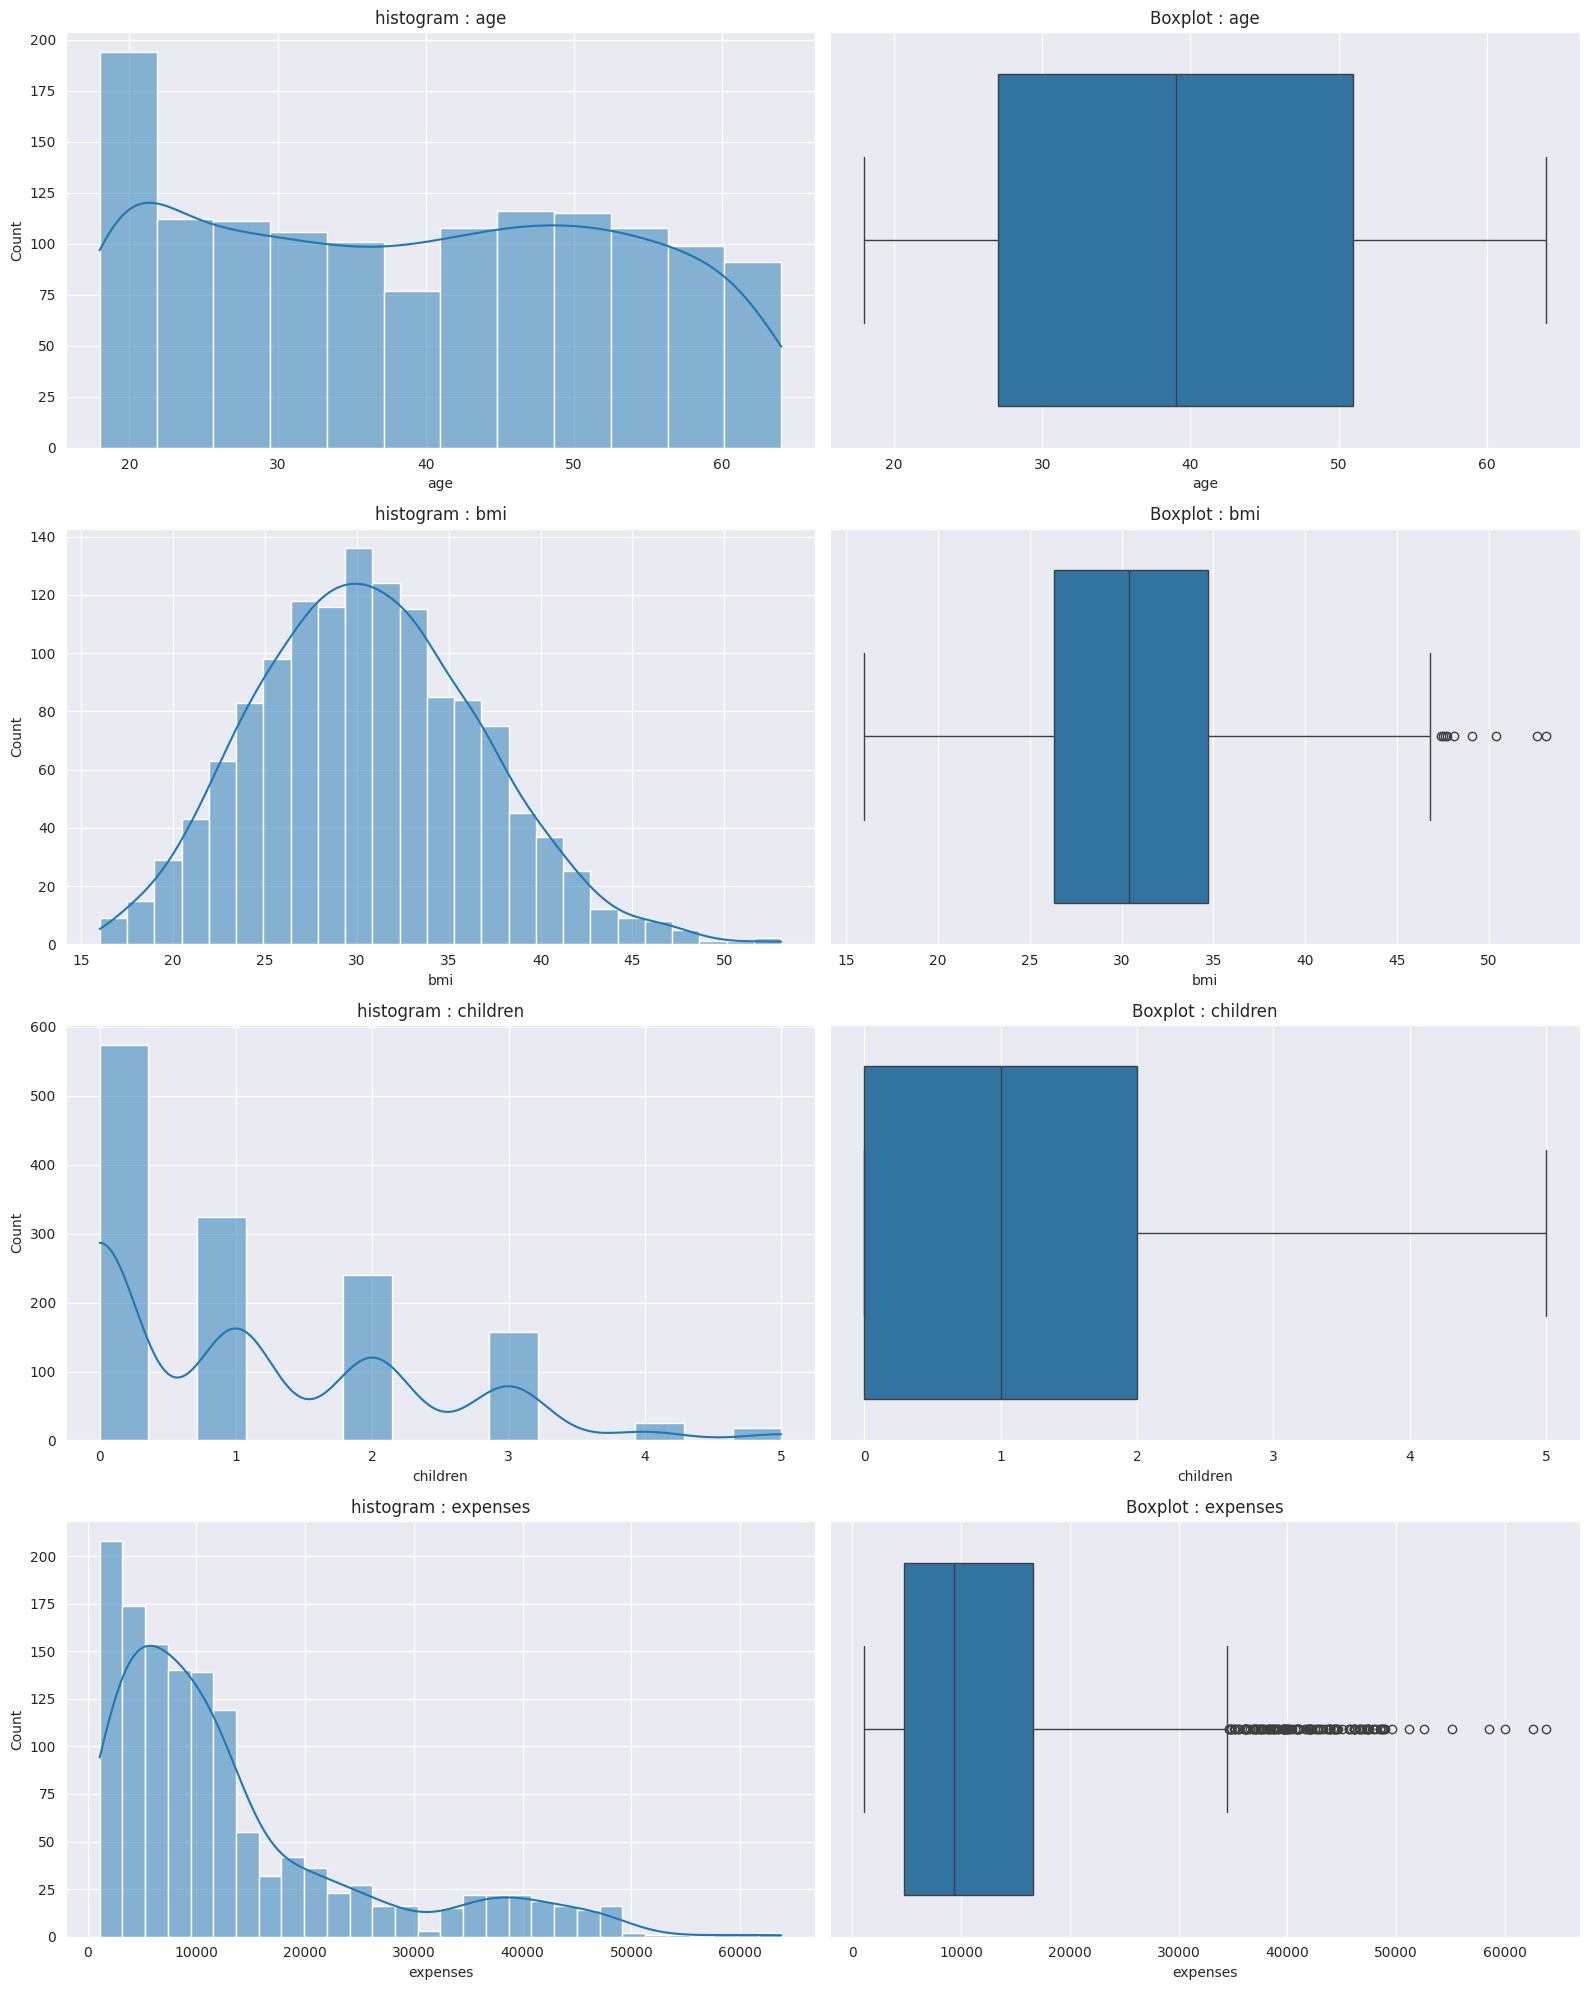

In [104]:
selected_columns =  nums
plt.figure(figsize=(16,5*len(selected_columns )))
sns.set_style("darkgrid")

def plot_feature(data ,col,plot_num):
    plt.subplot(len(selected_columns),2,plot_num)
    sns.histplot(data=data,x=col,kde=True)
    plt.title( f"histogram : {col}")

    plt.subplot(len(selected_columns),2,plot_num +1)
    sns.boxplot(data=data,x=col)
    plt.title( f'Boxplot : {col}')

    
for num,col in enumerate(selected_columns):
    plot_feature(df,col,2*num + 1)
plt.tight_layout()
plt.show()

In [105]:
df["loc_y"] =  df["region"].apply(lambda x: x[:5])
df["loc_x"] =  df["region"].apply(lambda x: x[5:])
df.drop(columns="region",inplace=True)
cats = df.select_dtypes("object").columns.to_list()

In [107]:

for col in cats:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


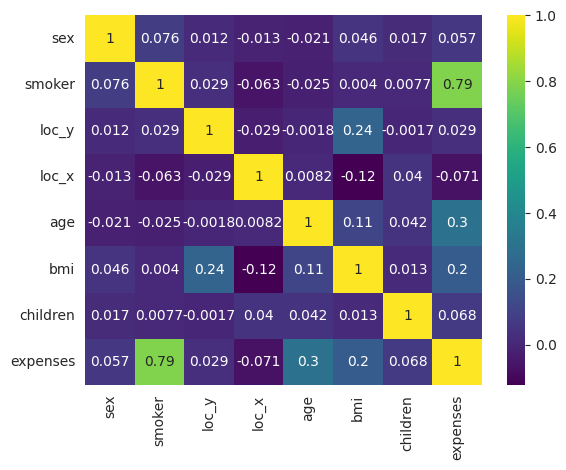

In [111]:
sns.heatmap(df[cats + nums].corr(),annot=True,cmap="viridis")
plt.show()

In [112]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'expenses', 'loc_y',
       'loc_x'],
      dtype='object')